In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
%matplotlib inline

In [2]:
df=pd.read_csv('messages.csv')

In [3]:
df.head()

,CONVERSATION ID,CONVERSATION TITLE,FROM,SENDER PROFILE URL,TO,RECIPIENT PROFILE URLS,DATE,SUBJECT,CONTENT,FOLDER
0,2-ZTVjMTdiYWYtZWY0NC00MTcyLWFhNzgtZjk4YzdjNWU5...,NaN,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,Veronica BANDE,https://www.linkedin.com/in/veronica-bande,2024-09-17 18:21:23 UTC,NaN,👍,INBOX
1,2-ZTVjMTdiYWYtZWY0NC00MTcyLWFhNzgtZjk4YzdjNWU5...,NaN,Veronica BANDE,https://www.linkedin.com/in/veronica-bande,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,2024-09-16 14:04:05 UTC,NaN,"Igualmente, Mark",INBOX
2,2-ZTVjMTdiYWYtZWY0NC00MTcyLWFhNzgtZjk4YzdjNWU5...,NaN,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,Veronica BANDE,https://www.linkedin.com/in/veronica-bande,2024-09-16 14:03:37 UTC,NaN,Saluditos,INBOX
3,2-ZTE0YWFiMzItOGE5Yi00NTJjLTllYTQtMmU5MGIyZjk1...,NaN,Francisco Deustua,https://www.linkedin.com/in/franciscodeustua,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,2024-09-17 13:19:01 UTC,NaN,Hola Mark ¿Como estas? Quería molestarte y tra...,INBOX
4,2-MTNkOGMxODMtNTI4OC00MTM2LTgyMGUtMzM1MWM3OTFi...,NaN,Maria Infantino,https://www.linkedin.com/in/maria-infantino-37...,Mark Suárez,https://www.linkedin.com/in/marcosuareztv,2024-09-16 16:49:34 UTC,NaN,"Hola Mark, este mensaje es para notificarle qu...",INBOX


In [4]:
df.shape

(1098, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CONVERSATION ID         1098 non-null   object
 1   CONVERSATION TITLE      79 non-null     object
 2   FROM                    1098 non-null   object
 3   SENDER PROFILE URL      953 non-null    object
 4   TO                      1095 non-null   object
 5   RECIPIENT PROFILE URLS  1044 non-null   object
 6   DATE                    1098 non-null   object
 7   SUBJECT                 7 non-null      object
 8   CONTENT                 1083 non-null   object
 9   FOLDER                  1090 non-null   object
dtypes: object(10)
memory usage: 85.9+ KB


In [6]:
df.isna().sum()

CONVERSATION ID              0
CONVERSATION TITLE        1019
FROM                         0
SENDER PROFILE URL         145
TO                           3
RECIPIENT PROFILE URLS      54
DATE                         0
SUBJECT                   1091
CONTENT                     15
FOLDER                       8
dtype: int64

In [7]:

cleaned_df = df.drop(columns=['CONVERSATION TITLE', 'SUBJECT'])


missing_data_summary = cleaned_df.isnull().sum()


missing_data_summary


CONVERSATION ID             0
FROM                        0
SENDER PROFILE URL        145
TO                          3
RECIPIENT PROFILE URLS     54
DATE                        0
CONTENT                    15
FOLDER                      8
dtype: int64

In [8]:
cleaned_df = cleaned_df.dropna(subset=['TO', 'CONTENT'])

In [9]:
missing_data_after_cleanup = cleaned_df.isnull().sum()

missing_data_after_cleanup

CONVERSATION ID             0
FROM                        0
SENDER PROFILE URL        144
TO                          0
RECIPIENT PROFILE URLS     51
DATE                        0
CONTENT                     0
FOLDER                      8
dtype: int64

In [10]:
cleaned_df['FOLDER'] = cleaned_df['FOLDER'].fillna('INBOX')

missing_data_after_fill = cleaned_df.isnull().sum()

missing_data_after_fill

CONVERSATION ID             0
FROM                        0
SENDER PROFILE URL        144
TO                          0
RECIPIENT PROFILE URLS     51
DATE                        0
CONTENT                     0
FOLDER                      0
dtype: int64

In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1097
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CONVERSATION ID         1080 non-null   object
 1   FROM                    1080 non-null   object
 2   SENDER PROFILE URL      936 non-null    object
 3   TO                      1080 non-null   object
 4   RECIPIENT PROFILE URLS  1029 non-null   object
 5   DATE                    1080 non-null   object
 6   CONTENT                 1080 non-null   object
 7   FOLDER                  1080 non-null   object
dtypes: object(8)
memory usage: 75.9+ KB


In [12]:
cleaned_df['DATE']=pd.to_datetime(cleaned_df['DATE'],errors='coerce')

In [13]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1097
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   CONVERSATION ID         1080 non-null   object             
 1   FROM                    1080 non-null   object             
 2   SENDER PROFILE URL      936 non-null    object             
 3   TO                      1080 non-null   object             
 4   RECIPIENT PROFILE URLS  1029 non-null   object             
 5   DATE                    1080 non-null   datetime64[ns, UTC]
 6   CONTENT                 1080 non-null   object             
 7   FOLDER                  1080 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 75.9+ KB


In [14]:
cleaned_df.to_csv('tableau_ana.csv',index=False)

In [15]:
archived_messages_count = cleaned_df[cleaned_df['FOLDER'] == 'ARCHIVE'].shape[0]

archived_messages_count

85

In [16]:
# Encontrar el remitente más frecuente
most_frequent_sender = cleaned_df['FROM'].value_counts().idxmax()
most_frequent_sender_count = cleaned_df['FROM'].value_counts().max()

most_frequent_sender, most_frequent_sender_count


('Mark Suárez', 370)

In [17]:
sender_messages=cleaned_df['FROM'].value_counts()
sender_messages

FROM
Mark Suárez                   370
LinkedIn Member                91
Priscila Cejas                 22
Jorge Alberto Lima Cuellar     13
Sinergia Espacios              12
                             ... 
Google                          1
Oscar Sanchez Paz               1
Jonathan Villa                  1
Joanna Chen                     1
David Martínez-Becerra          1
Name: count, Length: 298, dtype: int64

In [18]:
top_sender =sender_messages.head(10)

C:\Users\alexA\AppData\Local\Temp\ipykernel_13204\412500061.py:7: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\alexA\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  func(*args, **kwargs)
C:\Users\alexA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


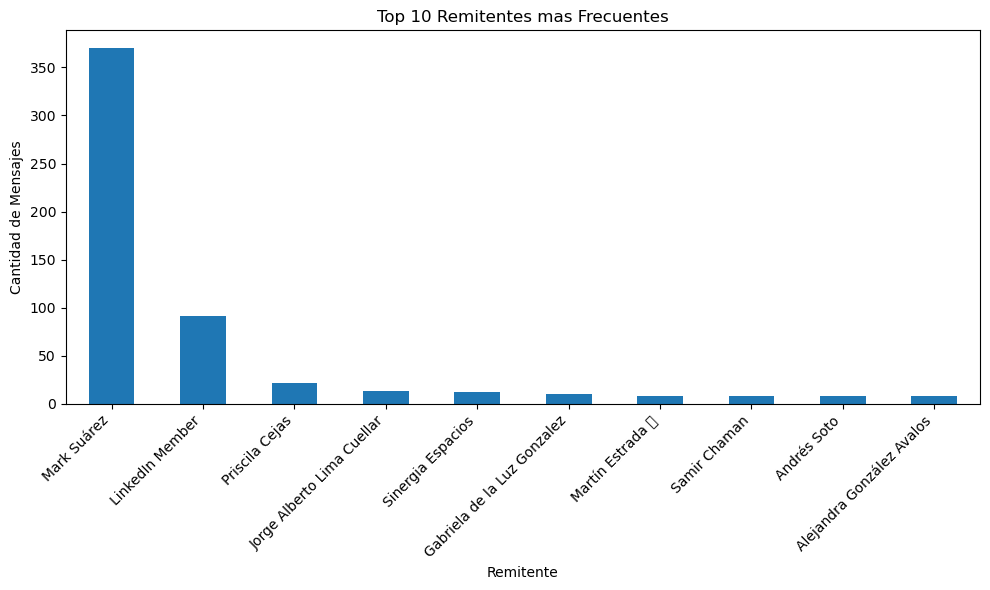

In [19]:
plt.figure(figsize=(10,6))
top_sender.plot(kind='bar')
plt.title('Top 10 Remitentes mas Frecuentes')
plt.xlabel('Remitente')
plt.ylabel('Cantidad de Mensajes')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [20]:
df['CONTENT'].head(25)

0                                                     👍
1                                      Igualmente, Mark
2                                             Saluditos
3     Hola Mark ¿Como estas? Quería molestarte y tra...
4     Hola Mark, este mensaje es para notificarle qu...
5     El le escribira para detallar el servicio y pr...
6     Con gusto atenderemos nos contactamos con uste...
7     agregame al whatsapp y me explicas más 2223811533
8     Le parece agendar una llamadita para explayar ...
9     Hola de nuevo Mark! Le comento  Utilizariamos ...
10                                         de que tipo?
11    Su perfil llamo mi atención y me preguntaba si...
12                        Hola Mark, un gusto saludarlo
13                               Hola Mark, conectemos!
14    <p class="spinmail-quill-editor__spin-break">H...
15    Que tal? Soy Antonio Fernández CEO y Co Fundad...
16    Hola Mark. Acabo de darme cuenta de que ambos ...
17    Hola Mark; Que gusto saludarte nuevamente 

In [21]:
df_cleaned_content = cleaned_df.dropna(subset=['CONTENT'])

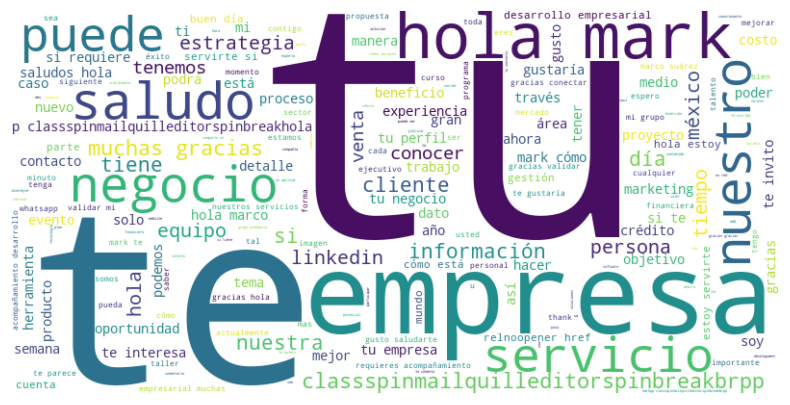

In [22]:
# Lista manual de stopwords en español
manual_stopwords = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", 
    "un", "para", "con", "no", "una", "su", "al", "es", "lo", "como", "más", 
    "pero", "sus", "le", "ya", "o", "fue", "este", "ha", "sí", "porque", 
    "esta", "son", "entre", "cuando", "muy", "sin", "sobre", "también", "me", 
    "hasta", "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos", 
    "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", 
    "e", "esto", "mí", "antes", "algunos", "qué", "unos", "yo", "otro", 
    "otras", "otra", "él", "tanto", "esa", "estos", "mucho", "quienes", 
    "nada", "muchos", "cual", "poco", "ella", "estar", "estas", "algunas", 
    "algo", "nosotros"
]

# Función modificada para limpiar el contenido
def clean_text_manual(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, URLs, menciones y números
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|\d+', '', text)
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
    # Tokenización y eliminación de manual_stopwords
    words = text.split()
    words = [word for word in words if word not in manual_stopwords]
    return ' '.join(words)

# Aplicar la función de limpieza a la columna CONTENT
df_cleaned_content['CONTENT_CLEAN'] = df_cleaned_content['CONTENT'].apply(clean_text_manual)

# Unir todo el texto limpio en una sola cadena
all_text_manual = ' '.join(df_cleaned_content['CONTENT_CLEAN'])

# Generar el Word Cloud
wordcloud_manual = WordCloud(width=800, height=400, background_color='white').generate(all_text_manual)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_manual, interpolation='bilinear')
plt.axis('off')
plt.show()


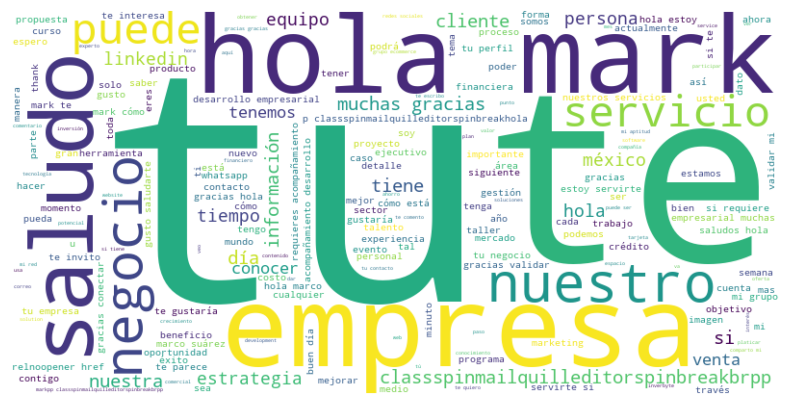

In [23]:
# Función para eliminar etiquetas HTML del texto
def remove_html_tags(text):
    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    return text

# Aplicar la limpieza adicional para remover código HTML
df_cleaned_content['CONTENT_CLEAN'] = df_cleaned_content['CONTENT_CLEAN'].apply(remove_html_tags)

# Unir todo el texto limpio en una sola cadena
all_text_no_html = ' '.join(df_cleaned_content['CONTENT_CLEAN'])

# Generar el Word Cloud sin HTML
wordcloud_no_html = WordCloud(width=800, height=400, background_color='white').generate(all_text_no_html)

# Mostrar el nuevo Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_html, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
import pandas as pd
from collections import Counter
import re

# Paso 1: Convertir la cadena de texto a una lista de palabras
palabras = re.findall(r'\b\w+\b', all_text_no_html.lower())

# Paso 2: Contar la frecuencia de cada palabra
contador_palabras = Counter(palabras)

# Paso 3: Obtener las palabras más comunes (por ejemplo, las 100 más comunes)
palabras_comunes = contador_palabras.most_common(100)

# Paso 4: Crear un DataFrame con las palabras y sus frecuencias
df_palabras_comunes = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])

# Paso 5: Exportar a un archivo Excel
df_palabras_comunes.to_excel('palabras_comunes.xlsx', index=False)

print("Archivo Excel exportado con las palabras y su frecuencia.")



Archivo Excel exportado con las palabras y su frecuencia.


In [25]:


# Paso 1: Convertir la cadena de texto a una lista de palabras
palabras = re.findall(r'\b\w+\b', all_text_no_html.lower())

# Paso 2: Contar la frecuencia de cada palabra
contador_palabras = Counter(palabras)

# Paso 3: Obtener las palabras más comunes (por ejemplo, las 100 más comunes)
palabras_comunes = contador_palabras.most_common(100)

# Paso 4: Extraer solo las palabras (sin las frecuencias) en una lista
solo_palabras = [palabra for palabra, _ in palabras_comunes]

# Paso 5: Unir todas las palabras en una sola cadena, separadas por espacios
cadena_palabras_comunes = ' '.join(solo_palabras)

# Paso 6: Crear un DataFrame con una sola fila que contenga la cadena de palabras
df_palabras_comunes = pd.DataFrame([cadena_palabras_comunes], columns=['Palabras Comunes'])

# Paso 7: Exportar a un archivo Excel
df_palabras_comunes.to_excel('palabras_comunes.xlsx', index=False)

print("Archivo Excel exportado con las palabras más comunes en una sola línea.")


Archivo Excel exportado con las palabras más comunes en una sola línea.


In [26]:
new_df = pd.DataFrame([all_text_no_html], columns=['texto'])


new_df.to_csv('texto.csv', index=False)



In [27]:
# Diccionarios manuales de palabras positivas y negativas
positive_words = [
    "bueno", "excelente", "genial", "feliz", "fantástico", "maravilloso", "positivo", "agradable", 
    "gracias", "bien", "mejor", "amable", "felicidades", "encantado", "contento", "optimista"
]

negative_words = [
    "malo", "terrible", "horrible", "triste", "negativo", "lamentable", "peor", "mal", 
    "odio", "fallo", "fallar", "desastroso", "molesto", "frustrado", "difícil", "preocupado"
]

# Función para calcular la polaridad manualmente
def calculate_polarity(text):
    words = text.split()
    polarity_score = 0
    for word in words:
        if word in positive_words:
            polarity_score += 1
        elif word in negative_words:
            polarity_score -= 1
    return polarity_score

# Aplicar la función de polaridad a cada mensaje limpio
df_cleaned_content['polarity_score'] = df_cleaned_content['CONTENT_CLEAN'].apply(calculate_polarity)

# Clasificar el sentimiento según la polaridad
df_cleaned_content['sentiment'] = df_cleaned_content['polarity_score'].apply(
    lambda x: 'positivo' if x > 0 else ('negativo' if x < 0 else 'neutral')
)

# Contar el número de mensajes por tipo de sentimiento
sentiment_counts_manual = df_cleaned_content['sentiment'].value_counts()

sentiment_counts_manual


sentiment
neutral     672
positivo    404
negativo      4
Name: count, dtype: int64

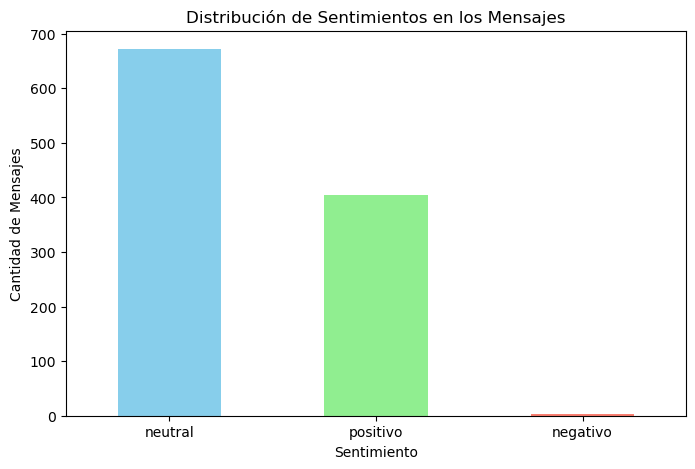

In [28]:
# Crear un gráfico de barras para mostrar la distribución de los sentimientos
plt.figure(figsize=(8, 5))
sentiment_counts_manual.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Distribución de Sentimientos en los Mensajes')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Mensajes')
plt.xticks(rotation=0)
plt.show()


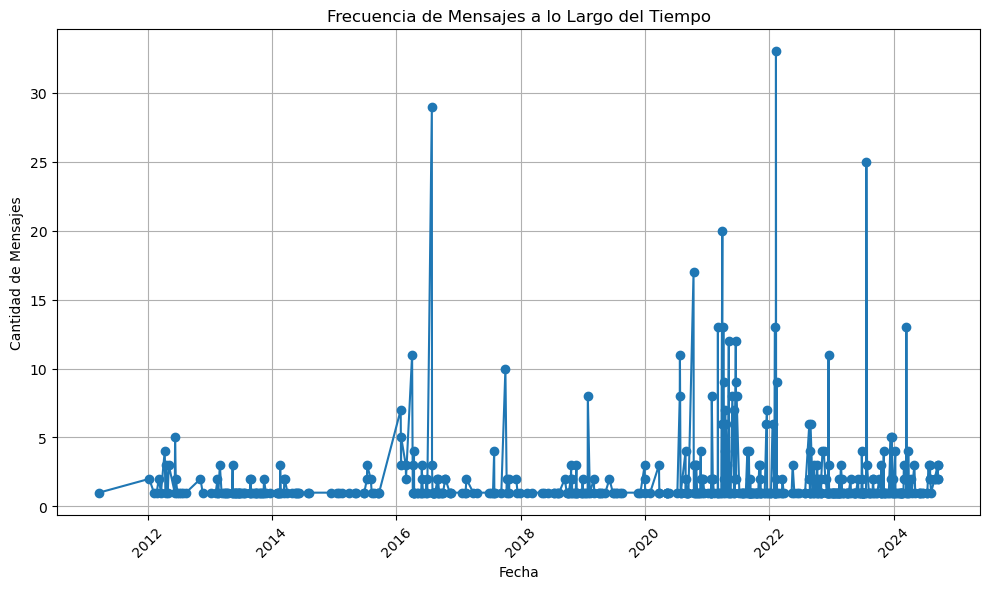

In [36]:
# Agrupar por fecha y contar los mensajes por día
messages_per_day = cleaned_df.groupby(cleaned_df['DATE'].dt.date).size()
messages_per_day.columns = ['Fecha', 'Cantidad de Mensajes']

# Generar el gráfico de frecuencia de mensajes por día
plt.figure(figsize=(10, 6))
messages_per_day.plot(kind='line', marker='o')

plt.title('Frecuencia de Mensajes a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Mensajes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
messages_per_day

DATE
2011-03-22    1
2012-01-11    2
2012-02-08    1
2012-02-24    1
2012-03-07    2
             ..
2024-08-29    2
2024-09-14    3
2024-09-15    2
2024-09-16    3
2024-09-17    2
Length: 535, dtype: int64

In [40]:
messages_per_day.to_csv('mensajes.csv',index=False)

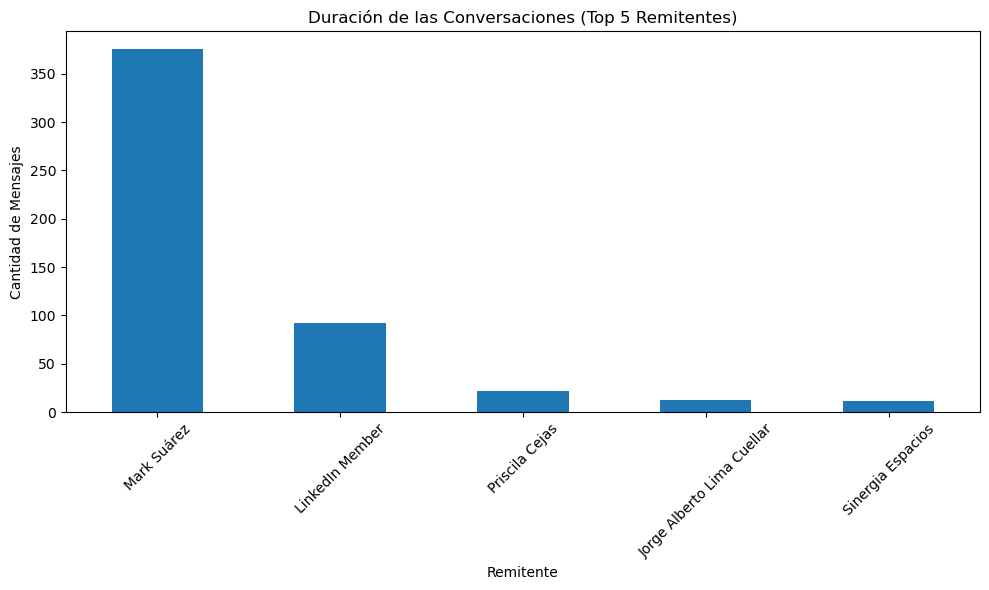

In [41]:
conversation_lengths_by_sender = df.groupby(['FROM', 'CONVERSATION ID']).size().groupby(level=0).sum().sort_values(ascending=False).head(5)

# Crear el gráfico utilizando el 'FROM' como etiqueta en lugar del ID de la conversación
plt.figure(figsize=(10, 6))
conversation_lengths_by_sender.plot(kind='bar')

plt.title('Duración de las Conversaciones (Top 5 Remitentes)')
plt.xlabel('Remitente')
plt.ylabel('Cantidad de Mensajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()